Choose file to use as input.

In [970]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_index = 3
data_files = [
    ('data/krwusd_1994-2024.csv', 'KRW/USD (1994-2024)'), # 0
    ('data/krwusd_2004-2024.csv', 'KRW/USD (2004-2024)'), # 1
    ('data/krwusd_2014-2024.csv', 'KRW/USD (2014-2024)'), # 2
    ('data/krwusd_2019-2024.csv', 'KRW/USD (2019-2024)'), # 3
    ('data/krwpln_1994-2024.csv', 'KRW/PLN (1994-2024)'), # 4
    ('data/krwpln_2004-2024.csv', 'KRW/PLN (2004-2024)'), # 5
    ('data/krwpln_2014-2024.csv', 'KRW/PLN (2014-2024)'), # 6
    ('data/krwpln_2019-2024.csv', 'KRW/PLN (2019-2024)'), # 7
]
file_name = data_files[file_index][0]
title = data_files[file_index][1]

Load and display the data

In [971]:
data = pd.read_csv(file_name)[['Data', 'Otwarcie']]
data = data.rename(columns={'Data': 'Date', 'Otwarcie': 'Value'})
data['Date'] = pd.to_datetime(data['Date'])
display(data)

,Date,Value
0,2019-01-02,0.000897
1,2019-01-03,0.000891
2,2019-01-04,0.000889
3,2019-01-07,0.000897
4,2019-01-08,0.000895
...,...,...
1257,2023-12-25,0.000770
1258,2023-12-26,0.000772
1259,2023-12-27,0.000772
1260,2023-12-28,0.000772


Show exchange rate plot

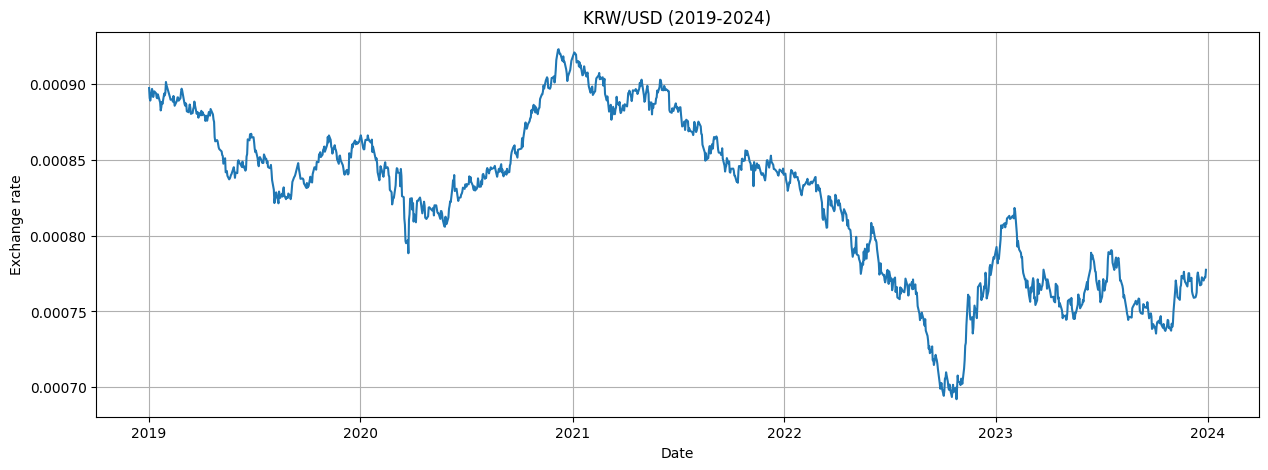

In [972]:
def plot_exchange_rate(data, title):
    plt.figure(figsize=(15, 5))
    plt.plot(data['Date'], data['Value'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Exchange rate')
    plt.grid()
    plt.show()

plot_exchange_rate(data, title)

Define `EMA`, `MACD` and `SIGNAL` functions

In [973]:
def EMA(data: pd.Series, start_index: int, n: int) -> float:
    alfa = 2 / (n + 1)
    nominator = 0
    denominator = 0
    counter = 0
    for i in range(start_index, start_index-n, -1):
        if i < 0:
            raise ValueError(f'N={n} is too large for index={start_index}')
        if np.isnan(data[i]):
            raise ValueError(f'Value at index {i} is NaN')

        nominator += data[i] * (1 - alfa)**counter
        denominator += (1 - alfa)**counter
        counter += 1

    return nominator / denominator

def MACD(data: pd.Series, index: int) -> float:
    return EMA(data, index, 12) - EMA(data, index, 26)

def SIGNAL(data: pd.Series, index: int) -> float:
    return EMA(data, index, 9)

Calculate MACD and SIGNAL values

In [974]:
for record in data.iterrows():
    index = record[0]
    if index < 26:
        continue
    data.at[index, 'MACD'] = MACD(data['Value'], index)
    if index < 34:
        continue
    data.at[index, 'SIGNAL'] = SIGNAL(data['MACD'], index)
display(data.tail(5))

,Date,Value,MACD,SIGNAL
1257,2023-12-25,0.000770,6.661550e-07,-2.233743e-07
1258,2023-12-26,0.000772,1.152616e-06,1.583687e-07
1259,2023-12-27,0.000772,1.655484e-06,5.500087e-07
1260,2023-12-28,0.000772,1.980434e-06,9.123809e-07
1261,2023-12-29,0.000777,2.621893e-06,1.352034e-06


Show MACD and SIGNAL plot

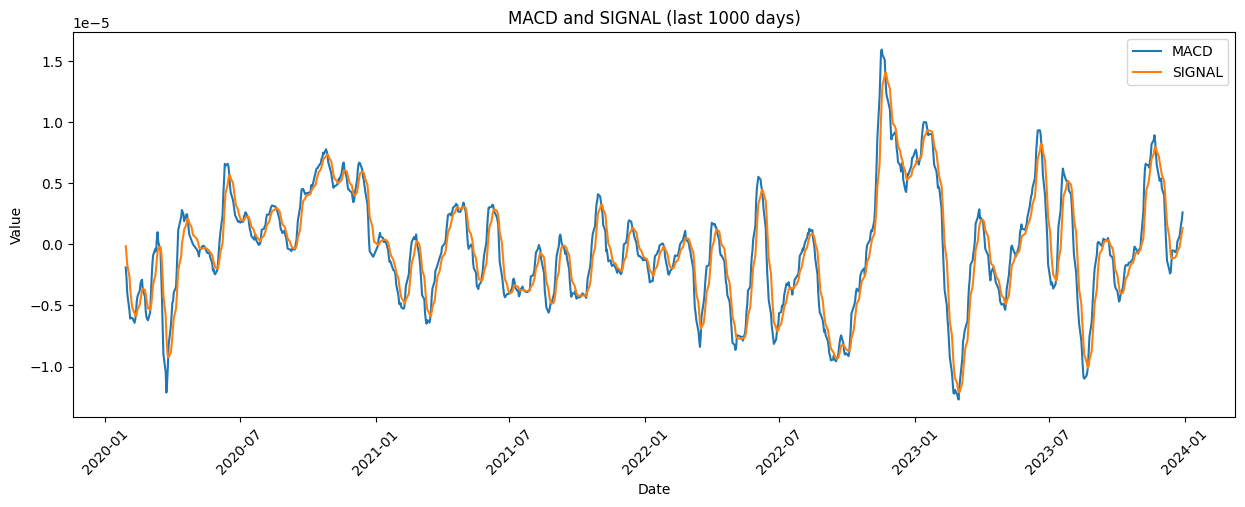

In [975]:
def plot_MACD_and_SIGNAL(data, title='MACD and SIGNAL'):
    plt.figure(figsize=(15, 5))
    plt.plot(data['Date'], data['MACD'])
    plt.plot(data['Date'], data['SIGNAL'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend(['MACD', 'SIGNAL'])
    plt.show()
    
days_count = 1000
tailed_data = data.tail(days_count)
plot_MACD_and_SIGNAL(tailed_data, title=f'MACD and SIGNAL (last {min(days_count, len(data))} days)')
